# Raman spectra visualization

## Read data

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
from scipy.signal import find_peaks
from scipy.signal import savgol_filter

In [72]:
## # Specify the directory where your text files are located
## directory_path = '/home/x41emon/kod/ml/demo'
## 
## # Create empty lists to store DataFrames for each file
## data_frames_neg = []
## data_frames_pos = []
## 
## # Use glob to find all text files in the specified directory
## txt_files = glob.glob('blank_signal_data/*.txt')
## 
## column_names = ['Wavelength', 'Intensity']
## 
## # Loop through each text file, read the data, and store it in separate DataFrames
## for file_path in txt_files:
##     # Read the data into a Pandas DataFrame, starting from the 5th line
##     df = pd.read_csv(file_path, skiprows=4, names=column_names)[:-1]
##     # Append the DataFrame to the list (skip the last line)
##     df['Wavelength'] = df['Wavelength'].astype(int)
##     data_frames_neg.append(df.pivot_table(values='Intensity', columns='Wavelength'))
## 
## # Use glob to find all text files in the specified directory
## txt_files = glob.glob(directory_path + '/s_protein_in_PBS/1ngml/*.txt')
## 
## # Loop through each text file, read the data, and store it in separate DataFrames
## for file_path in txt_files:
##     # Read the data into a Pandas DataFrame, starting from the 5th line
##     df = pd.read_csv(file_path, skiprows=4, names=['Wavelength', 'Intensity'])
##     # Append the DataFrame to the list (skip the last line)
##     data_frames_pos.append(df[:-1])

In [95]:
def reader_for_raw_data(directory_path, diagnostic):
    txt_files = glob.glob(directory_path + '/*.txt')
    column_names = ['Wavelength', 'Intensity']
    samples = []
    for file in txt_files:
        df = pd.read_csv(file, skiprows=4, names=column_names)[:-1]
        df['Wavelength'] = df['Wavelength'].astype(int)
        df = df.pivot_table(values='Intensity', columns='Wavelength')
        df['Diagnostic'] = diagnostic
        samples.append(df)
    return pd.concat(samples, ignore_index=True)

In [ ]:
df = reader_for_raw_data('blank_signal_data', 'blank')
df = pd.concat([df, reader_for_raw_data('s_protein_in_PBS/1ngml', 's protein')]).reset_index(drop=True)
display(df)

# df.to_csv('data.csv', index=False)

### Show data


<b><i>No need for cleaning and preprocessing<i><b>

## Data Visualization

In [ ]:
# df.loc[0][:-1].transpose().plot(title="Raman Spectra blank signal a sample", ylabel='Intensity', figsize=(20, 5))
# # df.loc[0][:-1].T.plot(title="Raman Spectra", ylabel='Intensity', figsize=(20, 5))

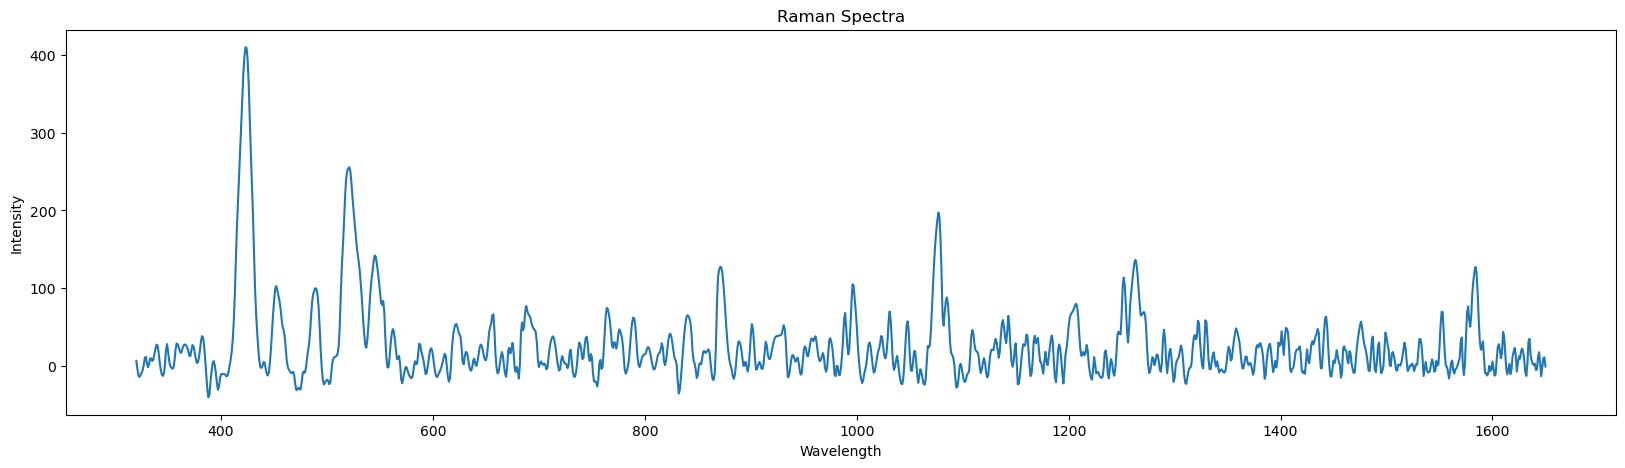

In [207]:
data = df.loc[0][:-1].values

x = df.columns[:-1].values

fig, ax = plt.subplots(figsize=(20, 5))

ax.plot(x, data)

ax.set_title("Raman Spectra")
ax.set_xlabel('Wavelength')
ax.set_ylabel('Intensity')

plt.show()


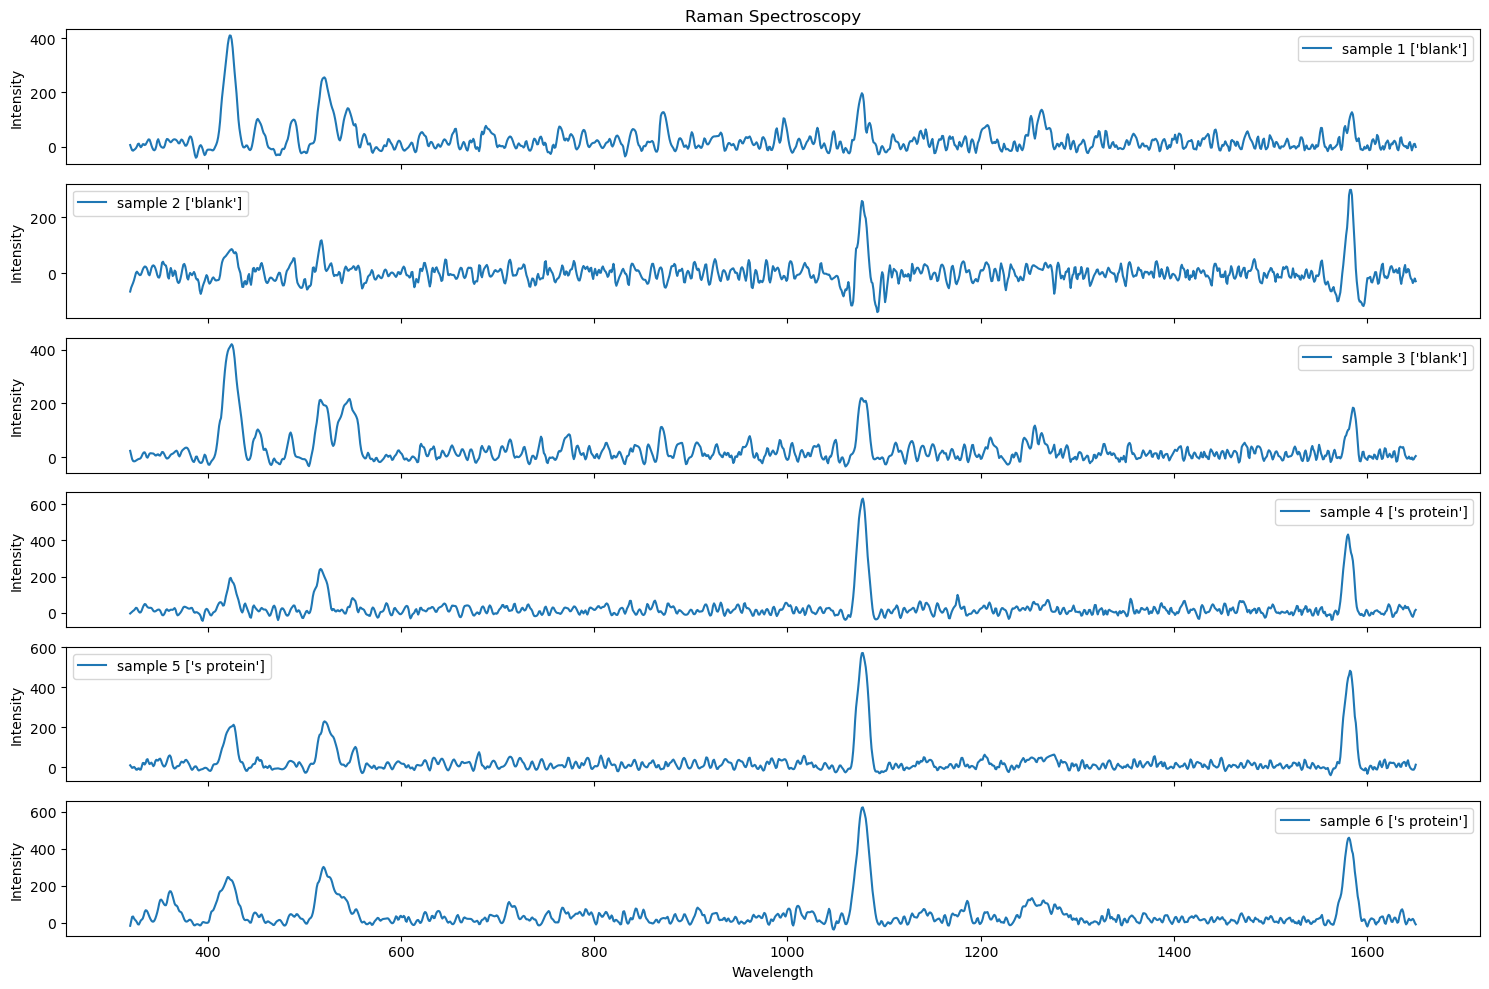

In [288]:
fig, axs = plt.subplots(len(df), 1, sharex=True, figsize=(15, 10))

for i in range(len(df)):
    axs[i].plot(x, df.iloc[i][:-1].values, label=f'sample {i + 1} {df.iloc[i][-1:].values}')
    axs[i].set_ylabel('Intensity')
    axs[i].legend()

axs[0].set_title('Raman Spectroscopy')
axs[len(df) - 1].set_xlabel('Wavelength')
plt.tight_layout()

plt.show()

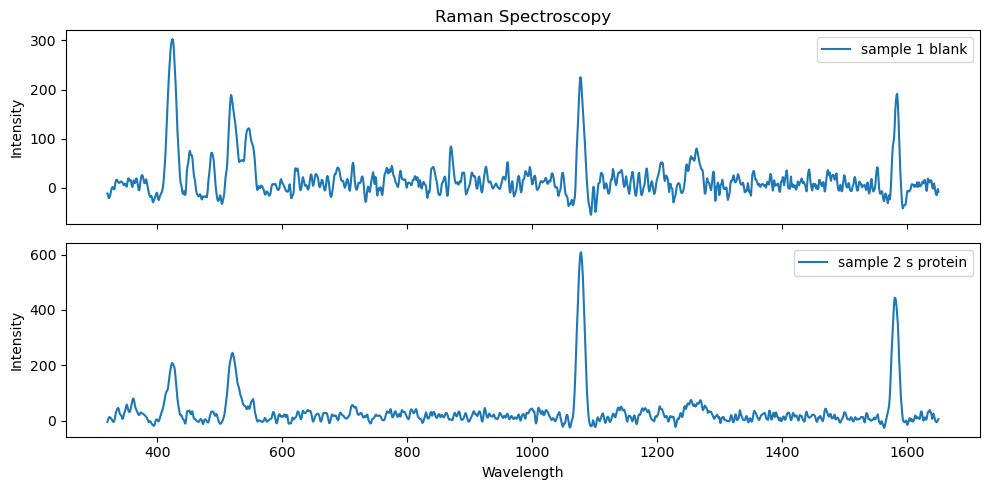

In [273]:
mean_df = df.groupby('Diagnostic').agg('mean')

fig, axs = plt.subplots(len(mean_df), 1, sharex=True, figsize=(10, 5))

for i in range(len(mean_df)):
    axs[i].plot(x, mean_df.iloc[i].values, label=f'sample {i + 1} {mean_df.index.values[i]}')
    axs[i].set_ylabel('Intensity')
    axs[i].legend()
    
axs[0].set_title('Raman Spectroscopy')
axs[len(mean_df) - 1].set_xlabel('Wavelength')
plt.tight_layout()

plt.show()

## Data comparison

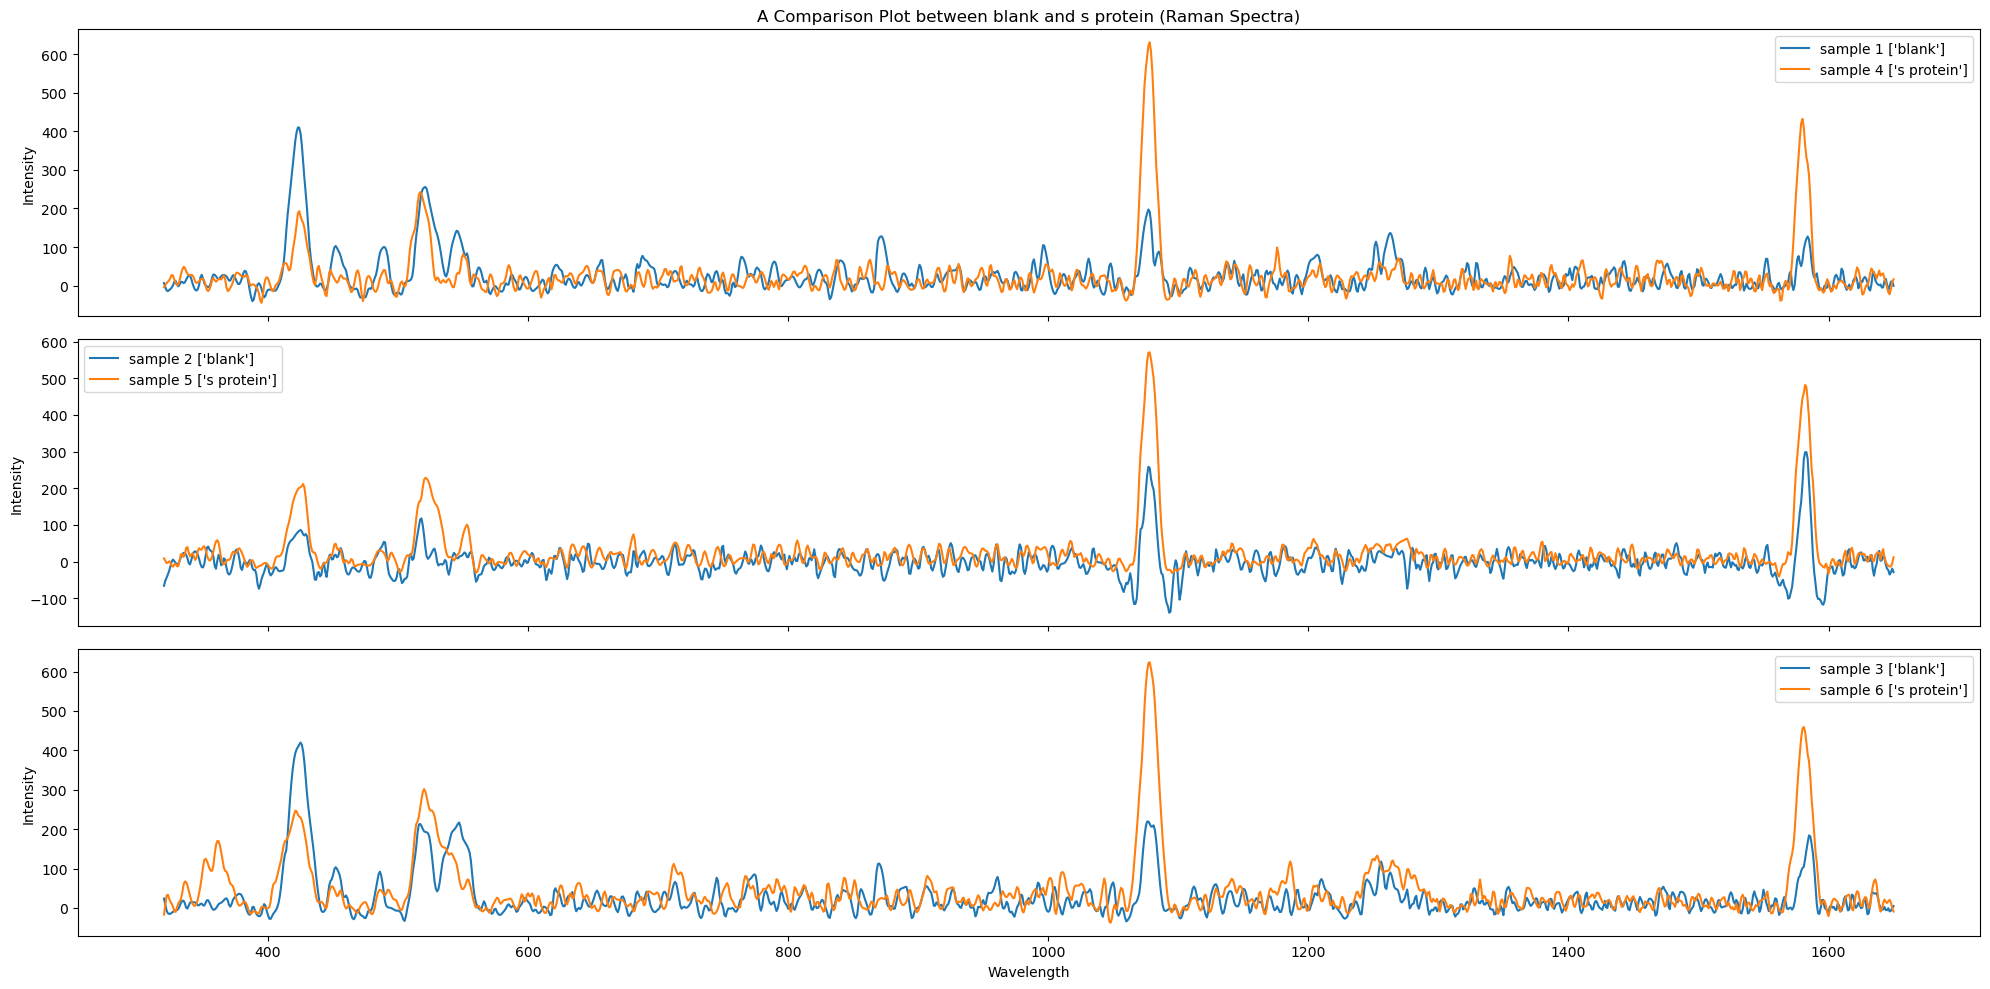

In [291]:
fig, axs = plt.subplots(3, 1, sharex=True, figsize=(20, 10))

for i in range(3):
    axs[i].plot(x, df.iloc[i][:-1].values, label=f'sample {i + 1} {df.iloc[i][-1:].values}')
    axs[i].plot(x, df.iloc[i + 3][:-1].values, label=f'sample {i + 4} {df.iloc[i + 3][-1:].values}')
    axs[i].set_ylabel('Intensity')
    axs[i].legend()

axs[0].set_title('A Comparison Plot between blank and s protein (Raman Spectra)')
axs[2].set_xlabel('Wavelength')
plt.tight_layout()

plt.show()

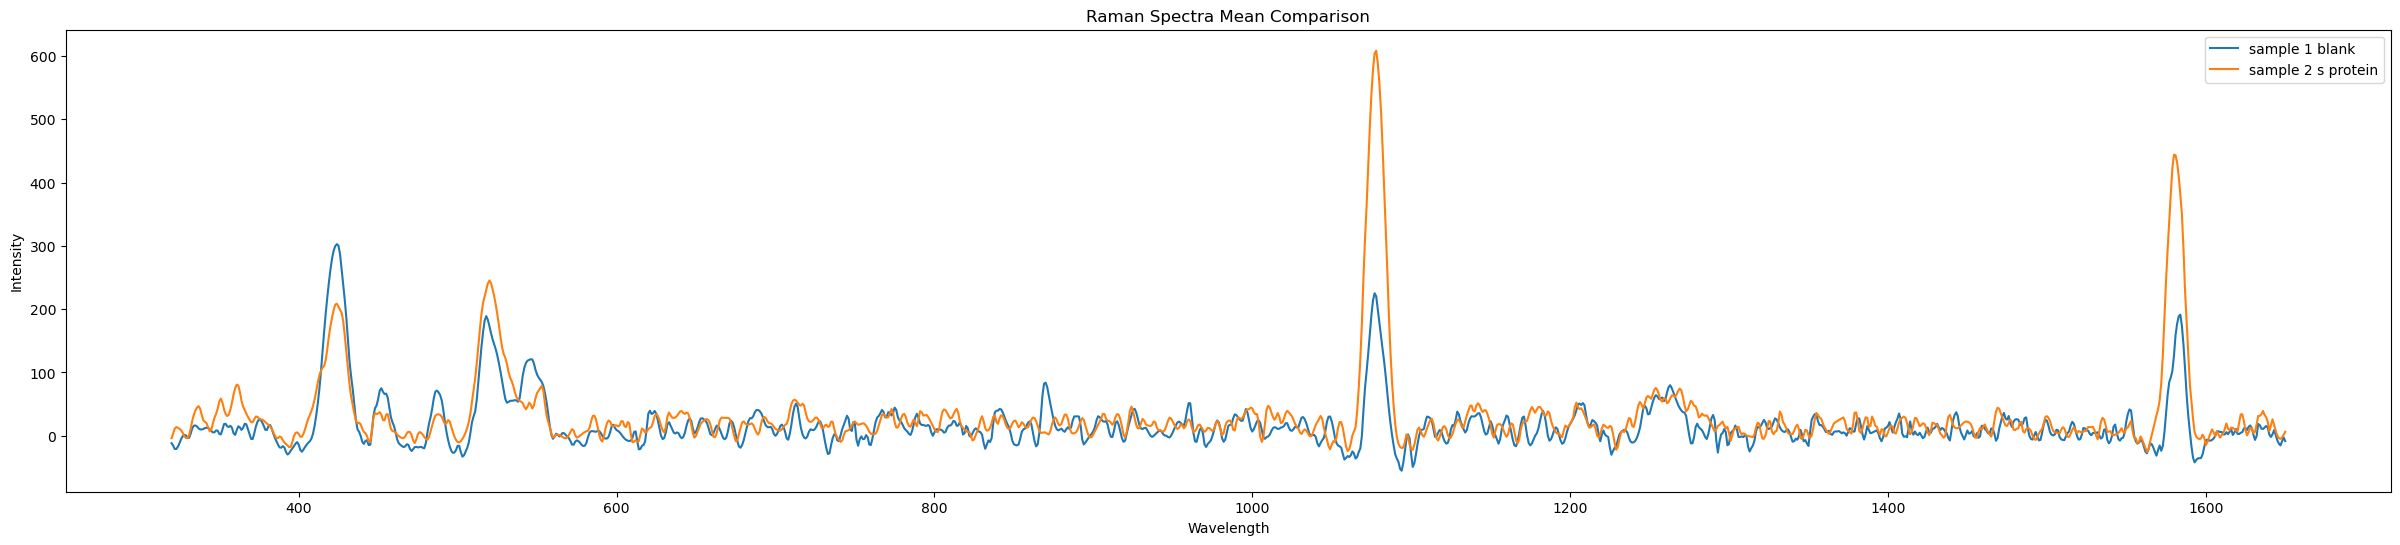

In [289]:
fig, ax = plt.subplots(figsize=(30, 6))

for i in range(len(mean_df)):
    ax.plot(x, mean_df.iloc[i].values, label=f'sample {i + 1} {mean_df.index.values[i]}')

ax.set_xlabel('Wavelength')
ax.set_ylabel('Intensity')
ax.set_title('Raman Spectra Mean Comparison')
ax.legend()

plt.show()

In [ ]:
# mean_df.loc['blank'].transpose().plot(title='Raman Spectra blank signal', ylabel='Intensity', figsize=(20, 5))
# mean_df.loc['s protein'].transpose().plot(title='Raman Spectra s protein signal', ylabel='Intensity', figsize=(20, 5))

In [ ]:
# Sample Raman spectrum data
x = df.iloc[0][:-1].values  # Wavelength values
y = df.columns.values       # Intensity values

# Smooth the spectrum using Savitzky-Golay filter
smoothed_spectrum = savgol_filter(y, window_length=25, polyorder=2)

# Find peaks in the smoothed spectrum
peaks, _ = find_peaks(smoothed_spectrum, height=0.1, distance=50)

# Plot the spectrum with detected peaks
plt.figure(figsize=(10, 6))
plt.plot(x, smoothed_spectrum, label='Smoothed Spectrum')
plt.plot(x[peaks], smoothed_spectrum[peaks], 'ro', label='Peaks')
plt.xlabel('Wavelength')
plt.ylabel('Intensity')
plt.title('Raman Spectrum with Detected Peaks')
plt.legend()
plt.show()
